In [3]:
import sympy
import numpy as np
from sympy import Eq, plot_implicit, Matrix, plot, symbols, latex, S, nonlinsolve
from sympy.core import sympify
from sympy.geometry.point import Point, Point2D, Point3D
from sympy.geometry.line import Line
from sympy.core.symbol import _symbol
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.geometry.entity import GeometryEntity, GeometrySet
import matplotlib.pyplot as plt
from IPython.display import Latex, display

# Практическое занятие 16
# Компьютерный практикум по алгебре на Python
## Кривые второго порядка на плоскости: парабола

### Задание 1
Определить класс Parabola.

Внутренние переменные $\_p$, $\_vertex$, $\_angle$.

Реализовать **атрибуты**:

**параметр** $p$

**вершина** (vertex) в виде точки Point

**фокус** (focus) в виде точки Point

**угол angle** по умолчанию 0 для параболы с осью, параллельной OX, и ветвями, направленными вправо

**ось симметрии** (axis_symmetry) в виде прямой Line

**директриса** (directrix) в виде прямой Line

Реализовать **методы**

**equation(self)** - уравнение параболы,

**dir_equation(self)** - уравнение директрисы,

**ax_sym_equation(self**) - уравнение оси симметрии,

**rotate(self, angle)** - поворот на угол angle против часовой стрелки, метод не изменяет параболу, а возвращает параболу с теми же p и вершиной, но угол увеличен на angle по сравнению с исходной параболой.

В конструкторе экземпляра класса  

\_\_new\_\_(cls, p, vertex=None, angle=None)

p - обязательный параметр, а вид параболы по умолчанию  - парабола с осью, параллельной оси OX,
вершина по умолчанию в начале координат.

In [115]:
x, y , x1 ,y1, p = sympy.symbols('x y x1 y1 p', real = True)

class Parabola(GeometrySet):
  def __new__(cls, p , vertex = None, angle = None, **kwargs):
    return super().__new__(cls, p , vertex, angle, **kwargs)

  def __init__(self,  p , vertex = None, angle = None, **kwargs):
    if (vertex == None):
      vertex = Point(0, 0)
    else:
      if (len(vertex) != 2):
        display(Latex(fr"\text{{The vertex must be a 2 dimensional point, }} {latex(len(vertex))} \text{{dimension point was given.}}"))
        if (len(vertex) < 2):
          display(Latex(fr"\text{{Given vertrex will be replaced by (0, 0)}}"))
          vertex = Point(0, 0)
        elif (len(vertex) > 2):
          display(Latex(fr"\text{{Vertex length will be trimmed to the correct number of dimensions.}}"))
          vertex = Point(vertex[0], vertex[1])
      else:
        vertex = Point(vertex[0], vertex[1])

    if (angle == None):
      angle = 0

    self._p = p
    self._angle = angle
    self._vertex = vertex

  @property
  def p(self):
    return self._p

  @property
  def vertex(self):
    return self._vertex

  @property
  def focus(self):
    return self.vertex + Point(sympy.cos(self.angle) * S(self.p) / 2, sympy.sin(self.angle) * S(self.p) / 2)

  @property
  def angle(self):
    return self._angle

  @property
  def axis_symmetry(self):
    return Line(self.vertex, self.focus)

  @property
  def directrix(self):
    return Line(self.vertex, self.focus).perpendicular_line(2 * self.vertex - self.focus)

  def equation(self):
    ver_x, ver_y = self.vertex.coordinates
    angle_sin, angle_cos = sympy.sin(self.angle), sympy.cos(self.angle)
    X = Matrix([[angle_cos, angle_sin], [-angle_sin, angle_cos]]) * Matrix([x - ver_x, y - ver_y])
    return sympy.Eq(sympy.simplify(X[1] ** 2), sympy.simplify(2 * self.p * X[0]))

  def dir_equation(self):
    expr_tmp = self.directrix.equation(x = x, y = y)
    free_cf = -expr_tmp.subs({x: 0, y: 0})
    return sympy.Eq(expr_tmp + free_cf, free_cf)
    # return sympy.Eq(self.directrix.equation(x = x, y = y), 0)

  def ax_sym_equation(self):
    expr_tmp = self.axis_symmetry.equation(x = x, y = y)
    free_cf = -expr_tmp.subs({x: 0, y: 0})
    return sympy.Eq(expr_tmp + free_cf, free_cf)
    # return sympy.Eq(self.axis_symmetry.equation(x = x, y = y), 0)

  def rotate(self, angle):
    return Parabola(self.p, self.vertex, self.angle + angle)

### Задание 2
Построить параболу с $p = 3$, вершиной в (-5, 2), осью симметрии, образующей угол $\pi/4$ с положительным направлением оси ОХ. Вывести на экран ее параметр p, вершину, угол, фокус, ось симметрии и директрису, а также уравнение параболы, оси симметрии и директрисы.

Изобразить на общем графике параболу, ее ось симметрии и директрису, парабола зеленая, ось симметрии красная, директриса черная.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

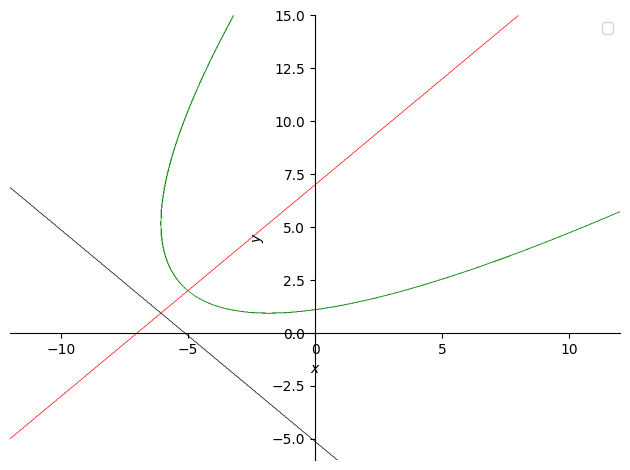

In [134]:
def Get_Parabola_Data(parab):
  dct_params = {'p': parab.p, "vertex": parab.vertex, "angle": parab.angle,
                "focus": parab.focus, "axis-symmetry": parab.axis_symmetry,
                "directrix": parab.directrix, "Parabola-eq": parab.equation(),
                "Directrix-eq": parab.dir_equation(), "Ax-sym-eq": parab.ax_sym_equation()}
  return dct_params

parab_2 = Parabola(p = 3, vertex = (-5, 2), angle = S(sympy.pi)/4)
dct_parab_2_data = Get_Parabola_Data(parab_2)
display(Latex(fr"\text{{Данные параболы:}}"))
display(*[Latex(f'{key} : {latex(dct_parab_2_data[key])}') for key in dct_parab_2_data.keys()])
print()

lst_plot_data = [(dct_parab_2_data["Parabola-eq"], "green"), (dct_parab_2_data["Ax-sym-eq"], "red"), (dct_parab_2_data["Directrix-eq"], "black")]

for i in range(len(lst_plot_data)):
  func, color_c = lst_plot_data[i]
  if (i == 0):
    plt = plot_implicit(func, (x, -12, 12), (y, -6, 15), legend = True, label = f"${latex(func)}$",  aspect_raio = (1, 1),
                        line_color = color_c, xlabel='$x$', ylabel='$y$', show = False)
  else:
    plt.append(plot_implicit(func, (x, -12, 12), (y, -6, 15), legend = True, label = f"${latex(func)}$", aspect_raio = (1, 1),
                             line_color = color_c, xlabel='$x$', ylabel='$y$', show = False)[0])

plt.show()

### Индивидуальное задание
Построить параболу $x^{2} = 2py$ с $p = 5$, построить другую параболу путем поворота исходной параболы  на угол $\alpha = \pi/5$ радиан. Вывести на экран вершину, угол, фокус, ось симметрии и директрису обеих парабол.

Использовать уравнения повернутой параболы, ее оси симметрии и директрисы для построения графиков в одной координатной плоскости. Парабола фиолетовая, ось симметрии зеленая, директриса черная, название графика Парабола, подписи осей $x$ и $y$.

Варинат №43


Центр $\operatorname{Point2D}\left(3, -4\right)$, парабола вида $x^{2} = 2py$ с $p = 3$. Угол поворота $2 \pi / 3$.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

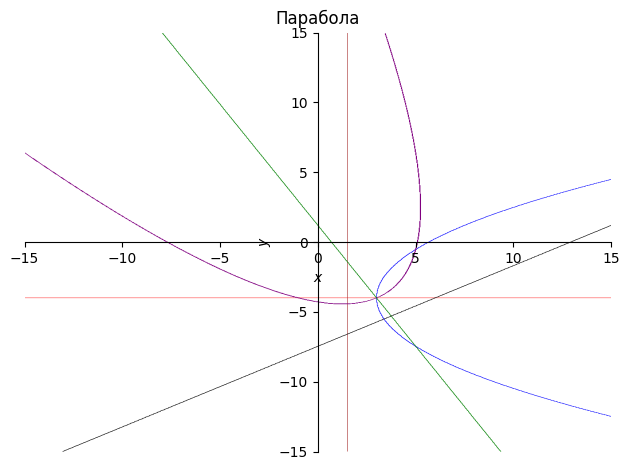

In [135]:
parab_ind_1 = Parabola(p = 3, vertex = (3, -4))
parab_ind_2 = parab_ind_1.rotate(S(sympy.pi * 2)/3)

dct_ind_1 = Get_Parabola_Data(parab_ind_1)
dct_ind_2 = Get_Parabola_Data(parab_ind_2)

display(Latex(fr"\text{{Данные исходной параболы:}}"))
display(*[Latex(f'{key} : {latex(dct_ind_1[key])}') for key in dct_ind_1.keys()])
print()
display(Latex(fr"\text{{Данные повернутой параболы:}}"))
display(*[Latex(f'{key} : {latex(dct_ind_2[key])}') for key in dct_ind_2.keys()])
print()

lst_plot_data_ind_full = [(dct_ind_1["Parabola-eq"], "blue"), (dct_ind_1["Ax-sym-eq"], "red"), (dct_ind_1["Directrix-eq"], "brown"),
                 (dct_ind_2["Parabola-eq"], "purple"), (dct_ind_2["Ax-sym-eq"], "green"), (dct_ind_2["Directrix-eq"], "black")]

lst_plot_data_ind = [(dct_ind_2["Parabola-eq"], "purple"), (dct_ind_2["Ax-sym-eq"], "green"), (dct_ind_2["Directrix-eq"], "black")]

for i in range(len(lst_plot_data_ind_full)):
  func, color_c = lst_plot_data_ind_full[i]
  if (i == 0):
    plt = plot_implicit(func, (x, -15, 15), (y, -15, 15), title = "Парабола",  aspect_raio = (1, 1),
                        line_color = color_c, xlabel='$x$', ylabel='$y$', show = False)
  else:
    plt.append(plot_implicit(func, (x, -15, 15), (y, -15, 15),  aspect_raio = (1, 1),
                             line_color = color_c, xlabel='$x$', ylabel='$y$', show = False)[0])

plt.show()